<a href="https://colab.research.google.com/github/alonsosilvaallende/Desigualdad-Covid19/blob/master/Tasa_incidencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

# Web scrapping
import requests
from bs4 import BeautifulSoup
import lxml.html as lh

# Retina display
%config InlineBackend.figure_format = 'retina'

Datos: https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1

In [2]:
data_raw = pd.read_csv(
    "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")

In [3]:
data_raw.head(3)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,2020-05-08,2020-05-11,2020-05-15,2020-05-18,2020-05-22,2020-05-25,2020-05-29,2020-06-01,2020-06-05,2020-06-08,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,2020-07-01,2020-07-05,2020-07-10,2020-07-13,2020-07-17,2020-07-20,2020-07-24,2020-07-27,2020-07-31,2020-08-03,2020-08-07,2020-08-10,2020-08-14,2020-08-17,2020-08-21,2020-08-24,2020-08-28,2020-08-31,2020-09-04,2020-09-07,2020-09-11,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,224.0,270.0,297.0,310.0,328.0,353.0,371.0,405.0,477.0,525.0,596.0,653.0,806.0,904.0,1046.0,1176.0,1371.0,1533.0,1758.0,1887.0,2139.0,2464.0,2721.0,3123.0,3372.0,3882.0,4211.0,4636.0,4874.0,5220.0,5543.0,5907.0,6131.0,6374.0,6577.0,6783.0,6969.0,7172.0,7344.0,7503.0,3030.9
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,13.0,13.0,15.0,16.0,21.0,23.0,23.0,24.0,25.0,25.0,27.0,25.0,26.0,26.0,26.0,26.0,2108.7
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,6.0,15.0,48.0,59.0,62.0,62.0,62.0,62.0,63.0,63.0,7777.8


In [4]:
data_RM = data_raw.query("Region == 'Metropolitana'").drop(columns=["Region", "Codigo region",  "Codigo comuna", "Tasa"]).set_index("Comuna").T

In [5]:
data_RM.head(3)

Comuna,Alhue,Buin,Calera de Tango,Cerrillos,Cerro Navia,Colina,Conchali,Curacavi,El Bosque,El Monte,Estacion Central,Huechuraba,Independencia,Isla de Maipo,La Cisterna,La Florida,La Granja,La Pintana,La Reina,Lampa,Las Condes,Lo Barnechea,Lo Espejo,Lo Prado,Macul,Maipu,Maria Pinto,Melipilla,Nunoa,Padre Hurtado,Paine,Pedro Aguirre Cerda,Penaflor,Penalolen,Pirque,Providencia,Pudahuel,Puente Alto,Quilicura,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquin,San Jose de Maipo,San Miguel,San Pedro,San Ramon,Santiago,Talagante,Tiltil,Vitacura,Desconocido Metropolitana
Poblacion,7405.0,109641.0,28525.0,88956.0,142465.0,180353.0,139195.0,36430.0,172000.0,40014.0,206792.0,112528.0,142065.0,40171.0,100434.0,402433.0,122557.0,189335.0,100252.0,126898.0,330759.0,124076.0,103865.0,104403.0,134635.0,578605.0,14926.0,141612.0,250192.0,74188.0,82766.0,107803.0,101058.0,266798.0,30433.0,157749.0,253139.0,645909.0,254694.0,136368.0,190075.0,160847.0,334836.0,103485.0,18644.0,133059.0,11953.0,86510.0,503147.0,81838.0,21477.0,96774.0,NaN
2020-03-30,0.0,7.0,6.0,0.0,19.0,32.0,14.0,5.0,18.0,0.0,16.0,17.0,15.0,0.0,10.0,43.0,5.0,0.0,24.0,10.0,181.0,68.0,4.0,14.0,10.0,43.0,0.0,6.0,67.0,10.0,0.0,7.0,10.0,31.0,0.0,82.0,17.0,45.0,17.0,21.0,17.0,9.0,32.0,13.0,0.0,25.0,0.0,0.0,127.0,0.0,0.0,83.0,NaN
2020-04-01,0.0,8.0,7.0,4.0,21.0,39.0,18.0,5.0,28.0,0.0,22.0,19.0,17.0,0.0,12.0,58.0,8.0,10.0,26.0,10.0,208.0,78.0,7.0,18.0,15.0,55.0,0.0,8.0,84.0,11.0,0.0,13.0,13.0,46.0,0.0,87.0,25.0,58.0,29.0,25.0,23.0,14.0,41.0,24.0,0.0,32.0,0.0,6.0,156.0,5.0,0.0,90.0,NaN


In [6]:
data_RM = data_RM.apply(lambda x: 100000*x[1:]/x[0], axis=0)

In [7]:
data_RM.index = pd.to_datetime(data_RM.index)

Crear un dataframe con las comunas de la conurbación de Santiago y el sector al que pertenecen.
Datos: https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago

In [8]:
url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago"

In [9]:
res = requests.get(url).text
soup = BeautifulSoup(res,'lxml')
soup.prettify()
table = soup.find('table',{'class':'wikitable sortable'}).find_all('tr')[1:]

In [10]:
df_stgo = pd.DataFrame(columns = ['Comuna','Sector'], index = None)
for items in table:
    data = items.find_all(['th','td'])
    name = data[0].text
    borough = data[1].text
    df_stgo = df_stgo.append({'Comuna':name,
                              'Sector':borough}, ignore_index = True)

In [11]:
df_stgo

,Comuna,Sector
0,Cerrillos,surponiente
1,Cerro Navia,norponiente
2,Conchalí,norte
3,El Bosque,sur
4,Estación Central,surponiente
5,Huechuraba,norte
6,Independencia,norte
7,La Cisterna,sur
8,La Florida,suroriente
9,La Granja,sur


In [12]:
conurbacion = list(df_stgo["Comuna"].str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [13]:
nororiente = list(df_stgo[df_stgo["Sector"] == 'nororiente']["Comuna"].str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [14]:
selected = ['La Pintana', 'Renca', 'La Granja', 'Santiago']

In [17]:
data_RM.tail(3)

Comuna,Alhue,Buin,Calera de Tango,Cerrillos,Cerro Navia,Colina,Conchali,Curacavi,El Bosque,El Monte,Estacion Central,Huechuraba,Independencia,Isla de Maipo,La Cisterna,La Florida,La Granja,La Pintana,La Reina,Lampa,Las Condes,Lo Barnechea,Lo Espejo,Lo Prado,Macul,Maipu,Maria Pinto,Melipilla,Nunoa,Padre Hurtado,Paine,Pedro Aguirre Cerda,Penaflor,Penalolen,Pirque,Providencia,Pudahuel,Puente Alto,Quilicura,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquin,San Jose de Maipo,San Miguel,San Pedro,San Ramon,Santiago,Talagante,Tiltil,Vitacura,Desconocido Metropolitana
2020-09-04,4118.838623,2465.318631,2219.106047,3623.139530,4914.891377,2695.824300,4688.386796,2780.675268,3959.883721,3191.383016,3150.508724,3615.100242,4794.284306,3106.718777,3427.126272,3558.356298,5914.798828,5795.547574,2386.984798,2954.341282,1876.895262,2869.209194,4357.579550,5018.055037,3886.805066,2684.214620,2766.983787,2900.884106,2315.821449,3058.446110,2546.939565,4216.023673,3080.409270,4586.241276,3808.365919,2154.054859,4123.031220,3817.101171,3762.161653,4713.715828,4659.213468,5775.053312,3513.063111,5092.525487,3743.831796,4156.051075,2108.257341,5385.504566,3083.790622,2232.459249,2858.872282,1684.336702,NaN
2020-09-07,4415.935179,2499.065131,2257.668712,3643.374252,4946.478082,2719.666432,4712.094544,2821.850124,3982.558140,3203.878642,3166.466788,3644.426276,4817.513110,3131.612357,3459.983671,3587.926437,5944.172915,5862.096284,2401.947093,2985.862661,1891.105004,2896.611754,4392.239927,5071.693342,3909.830282,2704.262839,2746.884631,2943.253397,2338.204259,3077.317086,2583.186333,4238.286504,3093.273170,4601.608708,3854.368613,2168.634983,4149.893932,3850.852055,3784.541450,4746.714772,4688.149415,5842.197865,3528.294449,5123.447843,3786.741043,4177.094372,2124.989542,5413.247023,3101.280540,2248.344290,2877.496857,1688.470044,NaN
2020-09-11,4550.979068,2548.316779,2271.691499,3673.726337,4997.718738,2744.063032,4756.636373,2849.300027,4008.720930,3228.869896,3182.908430,3666.642969,4842.853623,3144.059147,3490.849712,3620.975417,5964.571587,5901.180447,2415.911902,3009.503696,1906.826420,2909.507076,4425.937515,5124.373821,3929.884503,2739.520053,2773.683505,3043.527385,2363.384920,3100.231843,2652.055192,4267.970279,3118.011439,4622.973186,3857.654520,2180.045515,4188.212800,3887.544530,3799.853942,4774.580547,4706.037091,5894.421407,3552.784050,5146.639610,3813.559322,4207.907770,2141.721743,5434.053867,3124.335433,2264.229331,2872.840713,1707.070081,NaN


In [16]:
conurbacion = data_RM[conurbacion].loc["2020-09-11"].sort_values(ascending=True).index

In [21]:
first_date = data_RM.index[0].strftime('%d/%m')
last_date = data_RM.index[-1].strftime('%d/%m')
first_date, last_date

('30/03', '11/09')

In [18]:
data_RM.head(3)

Comuna,Alhue,Buin,Calera de Tango,Cerrillos,Cerro Navia,Colina,Conchali,Curacavi,El Bosque,El Monte,Estacion Central,Huechuraba,Independencia,Isla de Maipo,La Cisterna,La Florida,La Granja,La Pintana,La Reina,Lampa,Las Condes,Lo Barnechea,Lo Espejo,Lo Prado,Macul,Maipu,Maria Pinto,Melipilla,Nunoa,Padre Hurtado,Paine,Pedro Aguirre Cerda,Penaflor,Penalolen,Pirque,Providencia,Pudahuel,Puente Alto,Quilicura,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquin,San Jose de Maipo,San Miguel,San Pedro,San Ramon,Santiago,Talagante,Tiltil,Vitacura,Desconocido Metropolitana
2020-03-30,0.0,6.384473,21.034181,0.000000,13.336609,17.742982,10.057833,13.724952,10.465116,0.0,7.737243,15.107351,10.558547,0.0,9.956788,10.685008,4.079734,0.000000,23.939672,7.880345,54.722623,54.805119,3.851153,13.409576,7.427489,7.431668,0.0,4.236929,26.779433,13.479269,0.0,6.493326,9.895308,11.619278,0.0,51.981312,6.715678,6.966926,6.674676,15.399507,8.943838,5.595379,9.556917,12.562207,0.0,18.788658,0.0,0.000000,25.241132,0.000000,0.0,85.766838,NaN
2020-04-01,0.0,7.296541,24.539877,4.496605,14.740463,21.624259,12.931499,13.724952,16.279070,0.0,10.638709,16.884686,11.966353,0.0,11.948145,14.412337,6.527575,5.281644,25.934645,7.880345,62.885666,62.864696,6.739518,17.240884,11.141234,9.505621,0.0,5.649239,33.574215,14.827196,0.0,12.059034,12.863900,17.241509,0.0,55.150904,9.875997,8.979593,11.386212,18.332747,12.100487,8.703924,12.244800,23.191767,0.0,24.049482,0.0,6.935614,31.004855,6.109631,0.0,93.000186,NaN
2020-04-03,0.0,12.768946,24.539877,4.496605,18.250097,26.060005,15.805165,13.724952,20.348837,0.0,12.089443,19.550690,15.485869,0.0,11.948145,16.648734,13.055150,6.866137,29.924590,10.244448,67.723025,68.506399,8.665094,19.156538,17.083225,11.061087,0.0,6.355394,37.171452,18.870976,0.0,12.059034,12.863900,20.240032,0.0,59.588333,12.641276,11.766363,12.956725,25.665845,16.835460,11.190759,15.828644,27.057061,0.0,29.310306,0.0,10.403422,34.383590,7.331557,0.0,103.333540,NaN


In [19]:
selected = data_RM[nororiente + selected].loc["2020-03-30"].sort_values(ascending=True).index

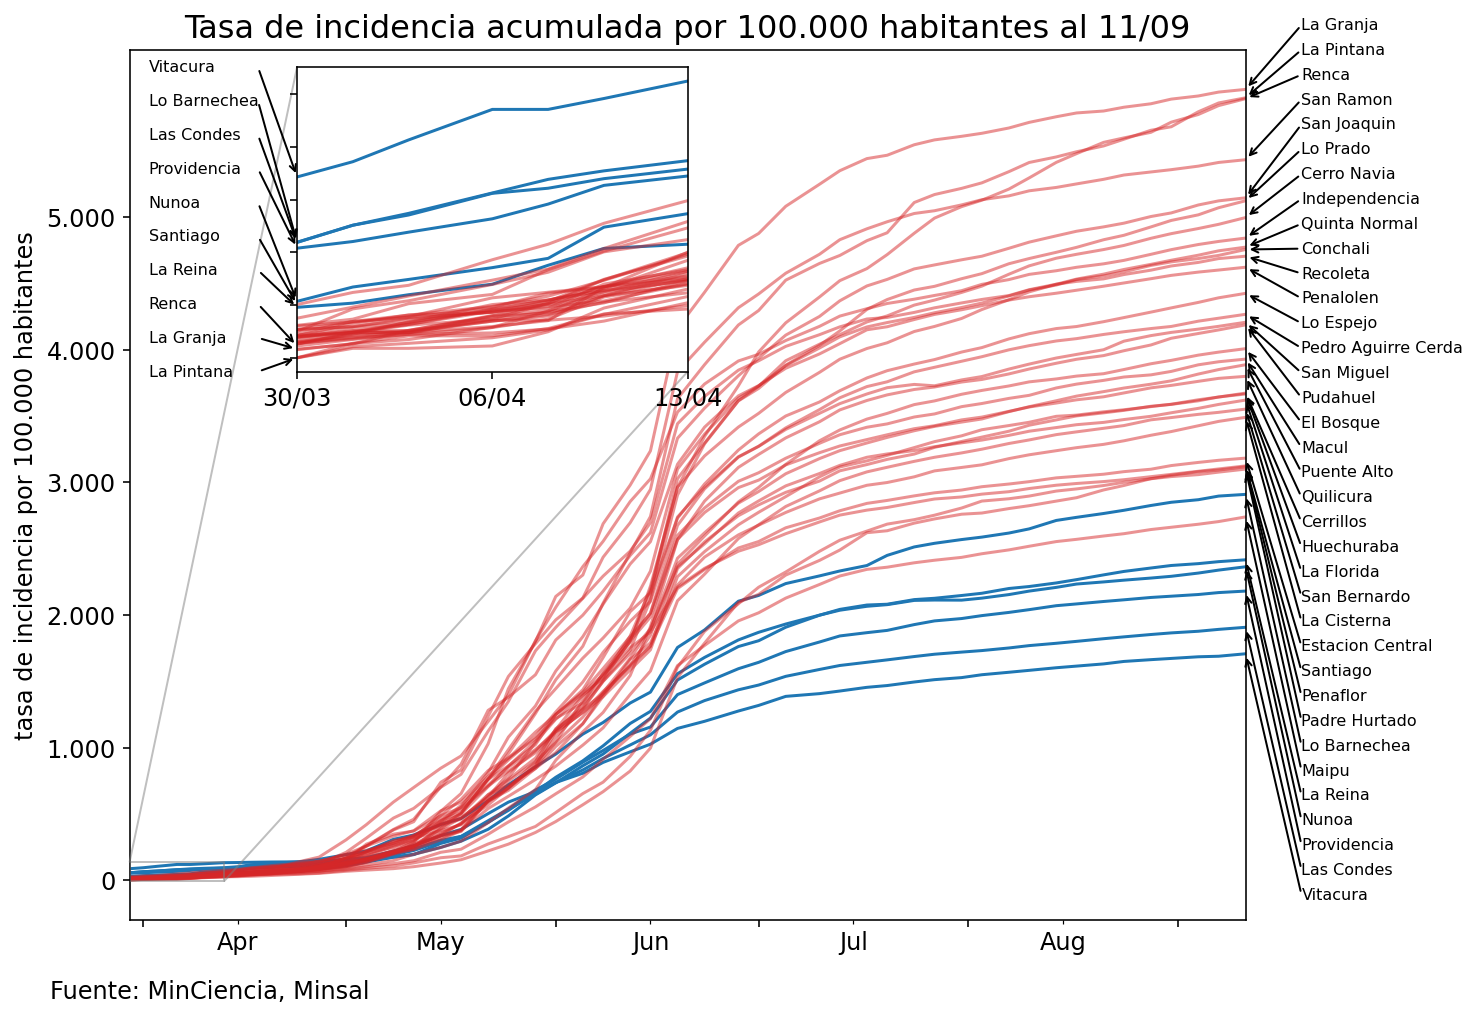

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
for comuna in conurbacion:
    if comuna in nororiente:
        ax.plot(data_RM[comuna], color='tab:blue')
    else:
        ax.plot(data_RM[comuna], color='tab:red', alpha=0.5)

[ax.annotate(s=f"", xy=[data_RM[comuna].index[-1], data_RM[comuna].values[-1]], xytext=(1.05,(i+1)/(len(conurbacion)-1)), arrowprops=dict(arrowstyle='->',connectionstyle="arc", color="black"), textcoords='axes fraction', va="center", ha="left", fontsize=8) for i, comuna in enumerate(conurbacion)]
[ax.annotate(s=f"{comuna}", xy=[data_RM[comuna].index[-1], data_RM[comuna].values[-1]], xytext=(1.05,(i+1)/(len(conurbacion)-1)), textcoords='axes fraction', va="center", ha="left", fontsize=8) for i, comuna in enumerate(conurbacion)]

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%h'));

# Format the x axis and y axis
ax.set_xlim(data_RM["Vitacura"].index[0],data_RM["Vitacura"].index[-1])
ax.set_yticks([1000*i for i in range(6)])
ax.set_yticklabels([f"{1000*i:,.0f}".replace(",",".") for i in range(6)])

# Zoom region
axins = ax.inset_axes([0.15, 0.63, 0.35, 0.35])
for comuna in conurbacion:
    if comuna in nororiente:
        axins.plot(data_RM[comuna].loc[:"2020-04-13"], color='tab:blue')
    else:
        axins.plot(data_RM[comuna].loc[:"2020-04-13"], color='tab:red', alpha=0.5)
        
# Format the x axis and y axis of the zoomed region
axins.set_yticklabels('')
axins.set_xlim(data_RM["Vitacura"].index[0],data_RM["Vitacura"].loc[:"2020-04-13"].index[-1])
axins.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))
axins.xaxis.set_major_locator(mdates.DayLocator(interval=7))

[axins.annotate(s=f"{comuna}", xy=[data_RM[comuna].loc[:"2020-04-13"].index[0], data_RM[comuna].loc[:"2020-04-13"].values[0]], xytext=(-0.38,(i)/(len(selected)-1)), textcoords='axes fraction', va="center", ha="left", fontsize=8) for i, comuna in enumerate(selected)]
[axins.annotate(s=f"", xy=[data_RM[comuna].loc[:"2020-04-13"].index[0], data_RM[comuna].loc[:"2020-04-13"].values[0]], xytext=(-0.1,(i)/(len(selected)-1)), arrowprops=dict(arrowstyle='->',connectionstyle="arc", color="black"), textcoords='axes fraction', va="center", ha="left", fontsize=8) for i, comuna in enumerate(selected)]
ax.indicate_inset_zoom(axins)

ax.set_title(f"Tasa de incidencia acumulada por 100.000 habitantes al {last_date}", fontsize=16)
ax.set_ylabel("tasa de incidencia por 100.000 habitantes", fontsize=12)
plt.annotate('Fuente: MinCiencia, Minsal', (0,0), (-40,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12)
plt.savefig("2020-09-11-Tasa-de-incidencia.png", bbox_inches='tight', format='png', dvi=8000)
# plt.show()

In [25]:
from google.colab import files
files.download("2020-09-11-Tasa-de-incidencia.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>